Total points for this HW: 100. Bonus points: 10.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Your answer here:   
##### When the insurance company needs to determine the home insurance price based on the geographic information and other urban data of the client's property. Because it is the insurer's responsibility to inform clients how their insurance prices are calculated.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here:
##### When the insurance company calculates the probability of needing to pay their clients by the urban data of the clients' property. Because they don't need to tell others this kind of information and more accuracy means more profit for the company.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here：
##### 1：Train a random forest model
##### 2：Traversal every tree in the RF, and extract all rulesets
##### 3：Remove duplicate rulesets
##### 4：Simplified rule sets are filtered out by rule length, error, and frequency
##### Mashayekhi, M., Gras, R. (2015). Rule Extraction from Random Forest: the RF+HC Methods. In: Barbosa, D., Milios, E. (eds) Advances in Artificial Intelligence. Canadian AI 2015. Lecture Notes in Computer Science(), vol 9091. Springer, Cham. https://doi.org/10.1007/978-3-319-18356-5_20

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [382]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [383]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [384]:
# your code here
df['No'] = 1
MostCommonMPG = df.groupby(['MPG','No'],as_index = False).agg({'No':'sum'})
MostCommonMPG
#计算信息增益
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

,MPG,No
0,bad,15
1,good,5


In [385]:
#计算信息增益
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [420]:
# cylinders : (=4 or not) & (=6 or not) & (=8 or not)
# weight: (=light or not) & (=medium or not) & (=weighty or not)

#for cylinders
# cylinders_all = df.groupby(['cylinders','MPG'])['No'].sum().to_frame().reindex( pd.MultiIndex.from_product([df.cylinders.unique(),  df.MPG.unique()], names=['cylinders', 'MPG']),fill_value=0).sort_values(by=['cylinders','MPG']).reset_index()
# cylinders_4 = cylinders_all.loc[cylinders_all['cylinders']==4]
# cylinders_6 = cylinders_all.loc[cylinders_all['cylinders']==6]
# cylinders_8 = cylinders_all.loc[cylinders_all['cylinders']==8]
# cylinders_4 = cylinders_4.reset_index()
# cylinders_6 = cylinders_6.reset_index()
# cylinders_8 = cylinders_8.reset_index()
# cylinders_4['other No'] = MostCommonMPG['No'] - cylinders_4['No']
# cylinders_6['other No'] = MostCommonMPG['No'] - cylinders_6['No']
# cylinders_8['other No'] = MostCommonMPG['No'] - cylinders_8['No']
# print('for cylinders=4 ')
# print(cylinders_4)
# print('for cylinders=6 ')
# print(cylinders_6)
# print('for cylinders=8 ')
# print(cylinders_8)

# #for weight
# weight_all = df.groupby(['weight','MPG'])['No'].sum().to_frame().reindex( pd.MultiIndex.from_product([df.weight.unique(), df.MPG.unique()], names=['weight', 'MPG']),fill_value=0).sort_values(by=['weight','MPG']).reset_index()
# weight_light = weight_all.loc[weight_all['weight']=='light']
# weight_medium = weight_all.loc[weight_all['weight']=='medium']
# weight_weighty = weight_all.loc[weight_all['weight']=='weighty']
# weight_light = weight_light.reset_index()
# weight_medium = weight_medium.reset_index()
# weight_weighty = weight_weighty.reset_index()
# weight_light['other No'] = MostCommonMPG['No'] - weight_light['No']
# weight_medium['other No'] = MostCommonMPG['No'] - weight_medium['No']
# weight_weighty['other No'] = MostCommonMPG['No'] - weight_weighty['No']

# print('for weight=light ')
# print(weight_light)
# print('for weight=medium ')
# print(weight_medium)
# print('for weight=weighty ')
# print(weight_weighty)

# #for information gain
# print(InformationGain(cylinders_4.loc[1,'No'],cylinders_4.loc[0,'No'],cylinders_4.loc[1,'other No'],cylinders_4.loc[0,'other No']))
# print(InformationGain(cylinders_6.loc[1,'No'],cylinders_6.loc[0,'No'],cylinders_6.loc[1,'other No'],cylinders_6.loc[0,'other No']))
# print(InformationGain(cylinders_8.loc[1,'No'],cylinders_8.loc[0,'No'],cylinders_8.loc[1,'other No'],cylinders_8.loc[0,'other No']))
# print(InformationGain(weight_light.loc[1,'No'],weight_light.loc[0,'No'],weight_light.loc[1,'other No'],weight_light.loc[0,'other No']))
# print(InformationGain(weight_medium.loc[1,'No'],weight_medium.loc[0,'No'],weight_medium.loc[1,'other No'],weight_medium.loc[0,'other No']))
# print(InformationGain(weight_weighty.loc[1,'No'],weight_weighty.loc[0,'No'],weight_weighty.loc[1,'other No'],weight_weighty.loc[0,'other No']))



# #for weight
weight_all = df.groupby(['weight','MPG'])['No'].sum().to_frame().reindex( pd.MultiIndex.from_product([df.weight.unique(), df.MPG.unique()], names=['weight', 'MPG']),fill_value=0).sort_values(by=['weight','MPG']).reset_index()
weight_All = pd.pivot_table(weight_all,index=["weight"],values=["No"],columns =["MPG"])
weight_All.columns = ['Group Y bad', 'Group Y good']
weight_All = weight_All.reset_index()
weight_All['Group N bad'] = weight_All['Group Y bad'].sum() - weight_All['Group Y bad']
weight_All['Group N good'] = weight_All['Group Y good'].sum() - weight_All['Group Y good']
weight_All.rename(columns={"weight": "split"},inplace=True)
weight_All['name'] = 'weight'


#for cylinders
cylinders_all = df.groupby(['cylinders','MPG'])['No'].sum().to_frame().reindex( pd.MultiIndex.from_product([df.cylinders.unique(),  df.MPG.unique()], names=['cylinders', 'MPG']),fill_value=0).sort_values(by=['cylinders','MPG']).reset_index()
cylinders_All = pd.pivot_table(cylinders_all,index=["cylinders"],values=["No"],columns =["MPG"])
cylinders_All.columns = ['Group Y bad', 'Group Y good']
cylinders_All = cylinders_All.reset_index()
cylinders_All['Group N bad'] = cylinders_All['Group Y bad'].sum() - cylinders_All['Group Y bad']
cylinders_All['Group N good'] = cylinders_All['Group Y good'].sum() - cylinders_All['Group Y good']
cylinders_All.rename(columns={"cylinders": "split"},inplace=True)
cylinders_All['name'] = 'cylinders'
discrete_valued = pd.concat([weight_All,cylinders_All])

# #for information gain
InformationGainValue = []
for index,rowa in discrete_valued.iterrows():
    info = InformationGain(rowa['Group Y good'],rowa['Group Y bad'],rowa['Group N good'],rowa['Group N bad'])
    InformationGainValue.append(info)

InformationGainValue
discrete_valued.insert(loc=5,column='InformationGain',value=InformationGainValue)
discrete_valued.reset_index(drop = True)
discrete_valued['type'] = 'discrete'
discrete_valued
# test = discrete_valued_variable.apply(lambda x:InformationGain(x['Group Y good'],x['Group Y bad'],x['Group N good'],x['Group N bad']),axis=1)
# test

,split,Group Y bad,Group Y good,Group N bad,Group N good,InformationGain,name,type
0,light,3,3,12,2,0.097107,weight,discrete
1,medium,6,2,9,3,0.000000,weight,discrete
2,weighty,6,0,9,5,0.153078,weight,discrete
0,4,4,5,11,0,0.365294,cylinders,discrete
1,6,6,0,9,5,0.153078,cylinders,discrete
2,8,5,0,10,5,0.122556,cylinders,discrete


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [387]:
# your code here
from pandas.core.frame import DataFrame
demo = df.sort_values(by=['HP'])
demo = demo.reset_index()
midpoint=[]
type(demo['HP'])
i = 0
while i < 19:
    a = (demo['HP'][i]+demo['HP'][i+1])/2
    i = i+1
    midpoint.append(a)
print('midpoint',midpoint)

demo1 = demo[['MPG','HP']]
demo1['new_MPG1'] = demo1['MPG']
demo1['new_MPG2'] = demo1['MPG']
demo1.loc[demo1['MPG'] == 'good','new_MPG1'] =1
demo1.loc[demo1['MPG'] != 'good','new_MPG1'] =0
demo1.loc[demo1['MPG'] == 'good','new_MPG2'] =0
demo1.loc[demo1['MPG'] != 'good','new_MPG2'] =1
# demo1
goodHP = []
badHP = []
for i in midpoint:
    a = demo1.loc[demo1['HP'] <= i,:]['new_MPG1'].sum()
    goodHP.append(a)
    b = demo1.loc[demo1['HP'] <= i,:]['new_MPG2'].sum()
    badHP.append(b)
real_valued = {'midpoint': midpoint,'Good': goodHP ,'Bad': badHP}
real_valued = DataFrame(real_valued)
real_valued['GoodN'] = MostCommonMPG.loc[1,'No'] - real_valued['Good']
real_valued['BadN'] = MostCommonMPG.loc[0,'No'] - real_valued['Bad']

n=0
InformationGain1 = []
while n < len(df):
    c = InformationGain(real_valued.loc[n,'Good'],real_valued.loc[n,'Bad'],real_valued.loc[n,'GoodN'],real_valued.loc[n,'BadN'])
#     print(c)
    InformationGain1.append(c)
    n = n+1
# InformationGain1
real_valued.insert(loc=5,column='InformationGain',value=InformationGain1)
real_valued.rename(columns={'midpoint':'split','Good':'Group Y good','Bad':'Group Y bad','GoodN':'Group N good','BadN':'Group N bad'},inplace=True)
real_valued['type'] = 'continuous'
real_valued['name'] = 'HP'
real_valued

midpoint [70.0, 78.0, 83.0, 87.0, 89.5, 91.0, 92.5, 93.5, 94.5, 95.0, 95.0, 97.5, 100.0, 105.0, 124.5, 142.0, 157.5, 172.5, 182.5]


,split,Group Y good,Group Y bad,Group N good,Group N bad,InformationGain,type,name
0,70.0,1,0,4,15,0.105915,continuous,HP
1,78.0,2,0,3,15,0.226258,continuous,HP
2,83.0,3,0,2,15,0.367103,continuous,HP
3,87.0,3,1,2,14,0.214171,continuous,HP
4,89.5,4,1,1,14,0.365777,continuous,HP
5,91.0,4,2,1,13,0.275927,continuous,HP
6,92.5,5,2,0,13,0.509186,continuous,HP
7,93.5,5,3,0,12,0.429505,continuous,HP
8,94.5,5,4,0,11,0.365294,continuous,HP
9,95.0,5,7,0,8,0.223357,continuous,HP


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Your answer here.
##### binary split should be if the HP >92.5
##### nodes represented HP<92.5 would require further partitioning

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [388]:
# your code here
all_split = pd.concat([discrete_valued,real_valued])
all_split = all_split.sort_values(by=['InformationGain'],ascending=False)
all_split = all_split.reset_index(drop = True)
all_split['Group Y'] = all_split['Group Y good'] * all_split['Group Y bad']
all_split['Group N'] = all_split['Group N good'] * all_split['Group N bad']
all_split

,split,Group Y bad,Group Y good,Group N bad,Group N good,InformationGain,name,type,Group Y,Group N
0,92.5,2,5,13,0,0.509186,HP,continuous,10,0
1,93.5,3,5,12,0,0.429505,HP,continuous,15,0
2,83.0,0,3,15,2,0.367103,HP,continuous,0,30
3,89.5,1,4,14,1,0.365777,HP,continuous,4,14
4,4,4,5,11,0,0.365294,cylinders,discrete,20,0
5,94.5,4,5,11,0,0.365294,HP,continuous,20,0
6,91.0,2,4,13,1,0.275927,HP,continuous,8,13
7,78.0,0,2,15,3,0.226258,HP,continuous,0,45
8,97.5,7,5,8,0,0.223357,HP,continuous,35,0
9,95.0,7,5,8,0,0.223357,HP,continuous,35,0


In [437]:
# for those car which HP < 92.5
df_1 = df.loc[df['HP'] <= 92.5,:]
df_1

MostCommonMPG1 = df_1.groupby(['MPG','No'],as_index = False).agg({'No':'sum'})
MostCommonMPG1

# #for weight
weight_all1 = df_1.groupby(['weight','MPG'])['No'].sum().to_frame().reindex( pd.MultiIndex.from_product([df.weight.unique(), df.MPG.unique()], names=['weight', 'MPG']),fill_value=0).sort_values(by=['weight','MPG']).reset_index()
weight_All1 = pd.pivot_table(weight_all1,index=["weight"],values=["No"],columns =["MPG"])
weight_All1.columns = ['Group Y bad', 'Group Y good']
weight_All1 = weight_All1.reset_index()
weight_All1['Group N bad'] = weight_All1['Group Y bad'].sum() - weight_All1['Group Y bad']
weight_All1['Group N good'] = weight_All1['Group Y good'].sum() - weight_All1['Group Y good']
weight_All1.rename(columns={"weight": "split"},inplace=True)
weight_All1['name'] = 'weight'
weight_All1.reset_index(drop = True)

#for cylinders
cylinders_all1 = df_1.groupby(['cylinders','MPG'])['No'].sum().to_frame().reindex( pd.MultiIndex.from_product([df.cylinders.unique(),df.MPG.unique()], names=['cylinders', 'MPG']),fill_value=0).sort_values(by=['cylinders','MPG']).reset_index()
cylinders_All1 = pd.pivot_table(cylinders_all1,index=["cylinders"],values=["No"],columns =["MPG"])
cylinders_All1.columns = ['Group Y bad', 'Group Y good']
cylinders_All1 = cylinders_All1.reset_index()
cylinders_All1['Group N bad'] = cylinders_All1['Group Y bad'].sum() - cylinders_All1['Group Y bad']
cylinders_All1['Group N good'] = cylinders_All1['Group Y good'].sum() - cylinders_All1['Group Y good']
cylinders_All1.rename(columns={"cylinders": "split"},inplace=True)
cylinders_All1['name'] = 'cylinders'
cylinders_All1.reset_index(drop = True)


discrete_valued1 = pd.concat([weight_All1,cylinders_All1])
# #for information gain

test = discrete_valued1.apply(lambda x:InformationGain(x['Group Y good'],x['Group Y bad'],x['Group N good'],x['Group N bad']),axis=1)
discrete_valued1['InformationGain'] = test
discrete_valued1['type'] = 'discrete'
# del discrete_valued1['index']
discrete_valued1


# for HP
from pandas.core.frame import DataFrame
demo_1 = df_1.sort_values(by=['HP'])
demo_1 = demo_1.reset_index()
midpoint=[]
i = 0
while i < len(df_1)-1:
    a = (demo_1['HP'][i]+demo_1['HP'][i+1])/2
    i = i+1
    midpoint.append(a)
print('midpoint',midpoint)

demo2 = demo_1[['MPG','HP']]
demo2['new_MPG1'] = demo2['MPG']
demo2['new_MPG2'] = demo2['MPG']
demo2.loc[demo1['MPG'] == 'good','new_MPG1'] =1
demo2.loc[demo1['MPG'] != 'good','new_MPG1'] =0
demo2.loc[demo1['MPG'] == 'good','new_MPG2'] =0
demo2.loc[demo1['MPG'] != 'good','new_MPG2'] =1
# demo2
goodHP = []
badHP = []
for i in midpoint:
    a = demo2.loc[demo1['HP'] <= i,:]['new_MPG1'].sum()
    goodHP.append(a)
    b = demo2.loc[demo1['HP'] <= i,:]['new_MPG2'].sum()
    badHP.append(b)
real_valued1 = {'midpoint': midpoint,'Good': goodHP ,'Bad': badHP}
real_valued1 = DataFrame(real_valued1)
real_valued1
real_valued1['GoodN'] = MostCommonMPG1.loc[1,'No'] - real_valued1['Good']
real_valued1['BadN'] = MostCommonMPG1.loc[0,'No'] - real_valued1['Bad']

n=0
InformationGain3 = []
while n < len(df_1)-1:
    c = InformationGain(real_valued1.loc[n,'Good'],real_valued1.loc[n,'Bad'],real_valued1.loc[n,'GoodN'],real_valued1.loc[n,'BadN'])
#     print(c)
    InformationGain3.append(c)
    n = n+1
# InformationGain3
real_valued1.insert(loc=5,column='InformationGain',value=InformationGain3)
real_valued1.rename(columns={'midpoint':'split','Good':'Group Y good','Bad':'Group Y bad','GoodN':'Group N good','BadN':'Group N bad'},inplace=True)
real_valued1['type'] = 'continuous'
real_valued1['name'] = 'HP'
real_valued1


all_split1 = pd.concat([discrete_valued1,real_valued1])
all_split1 = all_split1.sort_values(by=['InformationGain'],ascending=False)
all_split1 = all_split1.reset_index(drop = True)
all_split1['Group Y'] = all_split1['Group Y good'] * all_split1['Group Y bad']
all_split1['Group N'] = all_split1['Group N good'] * all_split1['Group N bad']
all_split1

midpoint [70.0, 78.0, 83.0, 87.0, 89.5, 91.0]


,split,Group Y bad,Group Y good,Group N bad,Group N good,name,InformationGain,type,Group Y,Group N
0,4,0,5,2,0,cylinders,0.863121,discrete,0,0
1,6,2,0,0,5,cylinders,0.863121,discrete,0,0
2,light,0,3,2,2,weight,0.291692,discrete,0,4
3,medium,2,2,0,3,weight,0.291692,discrete,4,0
4,83.0,0,3,2,2,HP,0.291692,continuous,0,4
5,78.0,0,2,2,3,HP,0.169584,continuous,0,6
6,70.0,0,1,2,4,HP,0.076010,continuous,0,8
7,91.0,2,4,0,1,HP,0.076010,continuous,8,0
8,89.5,1,4,1,1,HP,0.061743,continuous,4,1
9,87.0,1,3,1,2,HP,0.005978,continuous,3,2


##### binary split should be if the cylinders = 4 or 6

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Your answer here
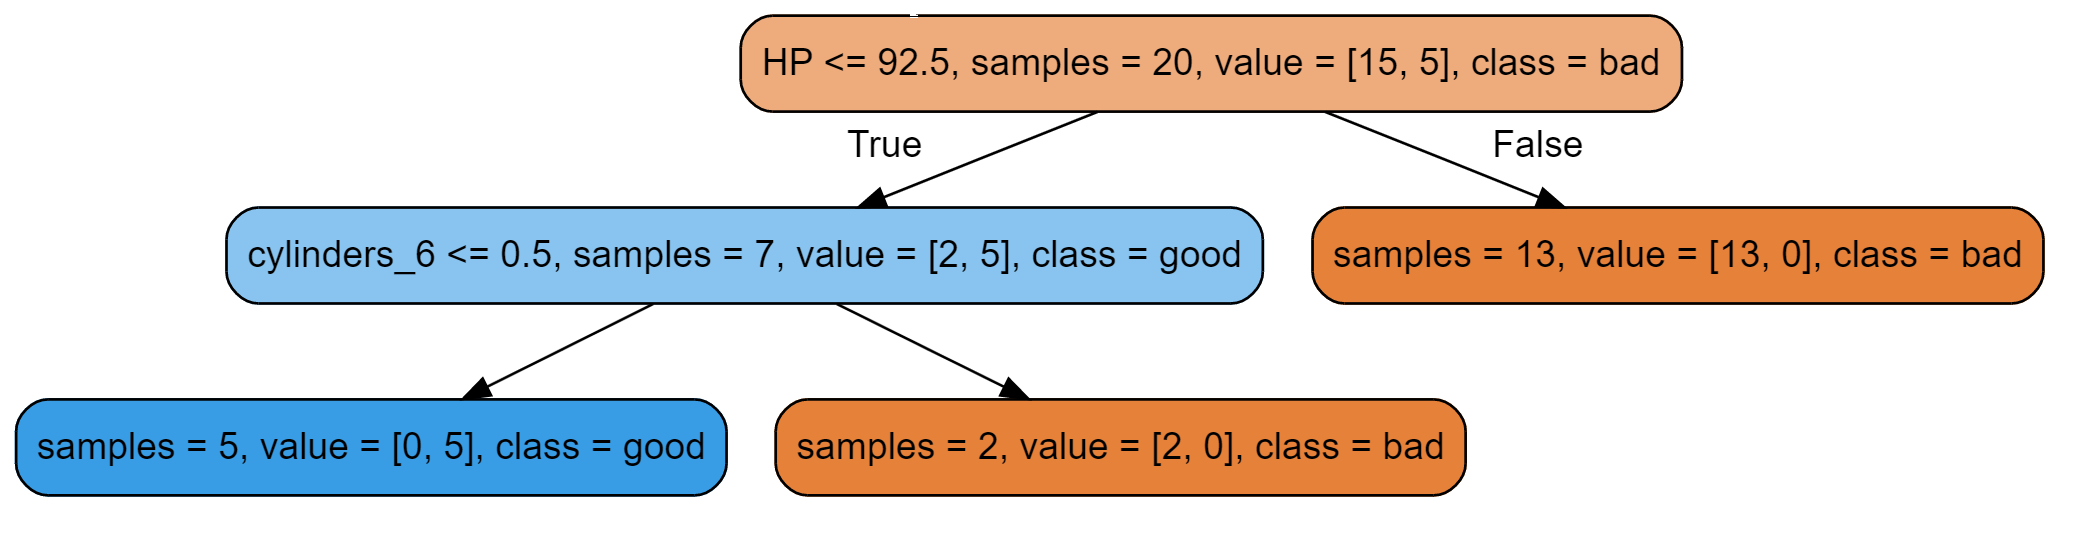


g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

???,4,95,light     bad

???,6,113,medium    bad

???,4,83,weighty    good

???,6,70,weighty    bad


### Question 3, Predicting burden of disease （40 pts)

In [390]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Country 1,1.0,0.18,51021,0.69307,0.84158,0.47525,0.70297,0.045,0.443,0.0010,65,6104,0.92475,0.92178,medium
1,Country 2,1.0,0.24,60614,0.58416,0.99010,0.63366,0.95050,0.061,0.488,0.0005,137,12505,0.95248,0.95149,low
2,Country 3,1.0,0.00,3404,0.77228,0.94059,0.94059,0.98020,0.073,0.868,0.0020,183,3649,0.96040,0.95941,low


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [391]:
# determine what kind of classification accuracy we need to ues
data.BurdenOfDisease.unique()
data.BurdenOfDisease.value_counts()
# accuracy is what we need to evaluate our result

low       33
high      33
medium    32
awful     32
Name: BurdenOfDisease, dtype: int64

In [392]:
# your code here
# split train/test set
from sklearn.model_selection import train_test_split
# remove records with any missing values
data=data.dropna()

# Let's take "BurdenOfDisease" as the target variable. 
y = data.loc[:,"BurdenOfDisease"]
# Other as the feature
x = data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=2022)

from sklearn.tree import DecisionTreeClassifier
from pandas.core.frame import DataFrame
# learn model
Max_leaf_nodes_accuracy = []
for i in range(2,500,5):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    Max_leaf_nodes_accuracy.append(dt.score(X_test,y_test))

c={"max_leaf_nodes":list(range(2,500,5)),"accuracy":Max_leaf_nodes_accuracy}
result = DataFrame(c)
result


,max_leaf_nodes,accuracy
0,2,0.435897
1,7,0.666667
2,12,0.769231
3,17,0.794872
4,22,0.794872
...,...,...
95,477,0.769231
96,482,0.794872
97,487,0.769231
98,492,0.794872


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

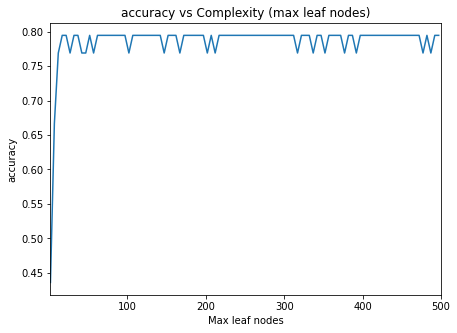

In [393]:
# your code here
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(result['max_leaf_nodes'],result['accuracy'])
plt.xlabel("Max leaf nodes")
plt.ylabel("accuracy")
plt.title("accuracy vs Complexity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [394]:
# your code here
from sklearn.model_selection import GridSearchCV
param = {'max_leaf_nodes':range(2,500,5)}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10)
grid.fit(X_train,y_train)
print('The Best Classifier:',grid.best_params_,'The Best Accuracy', grid.best_score_)

The Best Classifier: {'max_leaf_nodes': 262} The Best Accuracy 0.7142857142857143


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10 pts)

In [395]:
# your code here
data2 = data
from sklearn.model_selection import train_test_split
# remove records with any missing values
data2=data2.dropna()

# Let's take "BurdenOfDisease" as the target variable. 
y2=data2.loc[:,"BurdenOfDisease"]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X2=data2.loc[:,'FrxnPeaceIn10':'FemaleLtrcyRate']
X2=pd.get_dummies(X2)
# X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=999)

from sklearn import tree
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X2,y2)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X2.columns.values,  
                         class_names=['low','high','medium','awful'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2411.0, samples = 130, value = [32, 33, 33, 32], class = high", fillcolor="#ffffff"] ;
1 [label="SustAccImprSanUrb <= 0.678, samples = 52, value = [31, 20, 0, 1], class = low", fillcolor="#f6d4bb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 41, value = [30, 10, 0, 1], class = low", fillcolor="#eeae7f"] ;
1 -> 2 ;
3 [label="samples = 11, value = [1, 10, 0, 0], class = high", fillcolor="#59e84d"] ;
1 -> 3 ;
4 [label="AdultLtrcyRate <= 0.934, samples = 78, value = [1, 13, 33, 31], class = medium", fillcolor="#f7fbfe"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 46, value = [1, 12, 6, 27], class = awful", fillcolor="#eda8f4"] ;
4 -> 5 ;
6 [label="samples = 32, value = [0, 1, 27, 4], class = medium", fillcolor="#5caeea"] ;
4 -> 6 ;
}


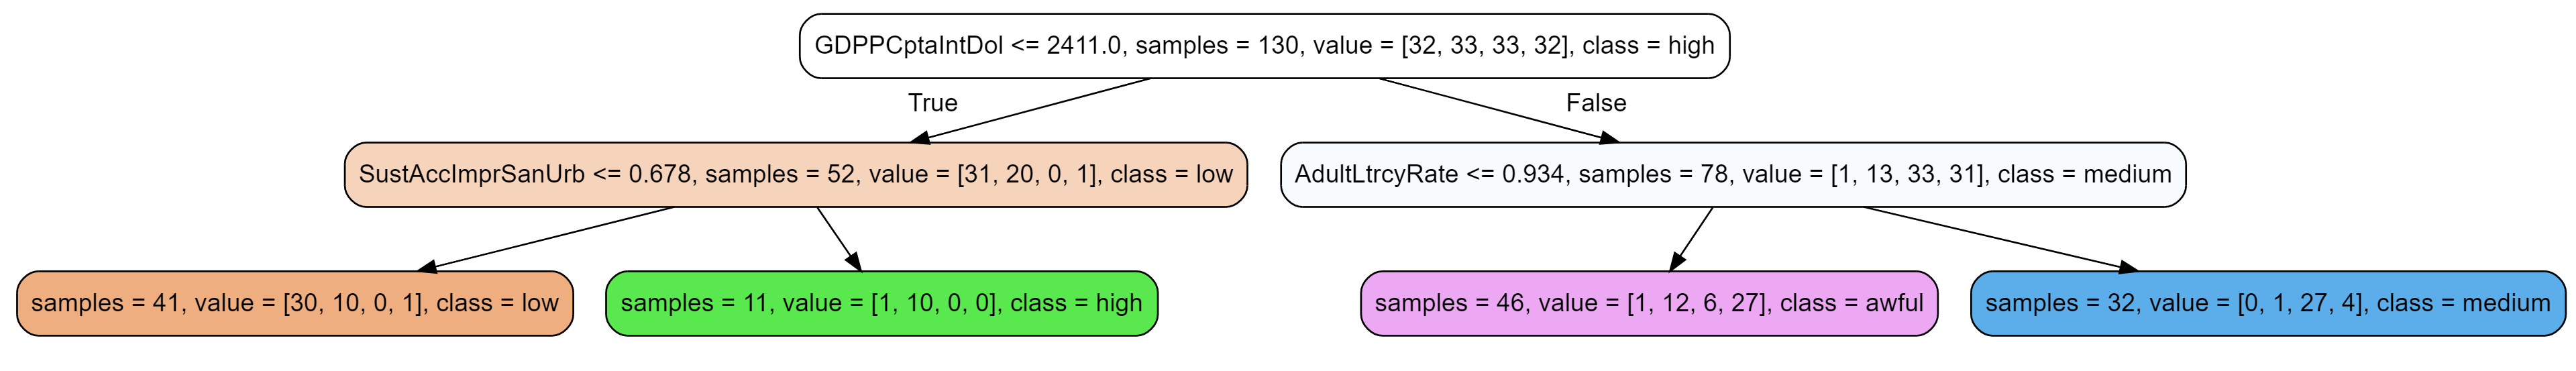

### Question 4, Fit a random forest to the data from question 3 (20+10 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (20 pts)

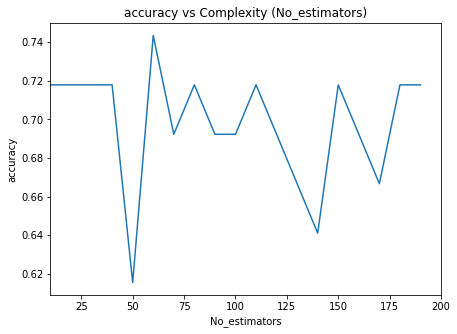

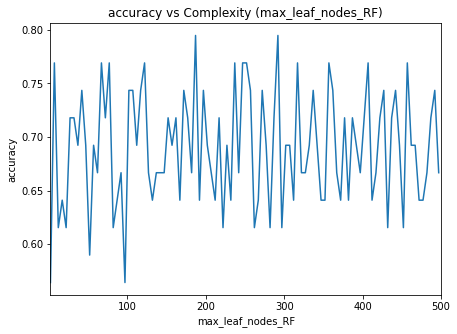

The Best Classifier: {'max_leaf_nodes': 447} The Best Accuracy 0.7582417582417582


In [396]:
# your code here
from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
# rf.fit(X_train, y_train)
# rf.score(X_test,y_test)

# TUNE n_estimators
No_estimators_accuracy = []
for n_est in range(10,200,10):
    rf = RandomForestClassifier(n_estimators=n_est, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train,y_train)
    No_estimators_accuracy.append(rf.score(X_test,y_test))
c1={"No_estimators_accuracy":list(range(10,200,10)),"accuracy":No_estimators_accuracy}
result1 = DataFrame(c1)
plt.figure(figsize=(7,5))
plt.plot(result1['No_estimators_accuracy'],result1['accuracy'])
plt.xlabel("No_estimators")
plt.ylabel("accuracy")
plt.title("accuracy vs Complexity (No_estimators)")
plt.xlim(10,200)
plt.show()

# TUNE max_leaf_nodes
Max_leaf_nodes_accuracy_RF = []
for i in range(2,500,5):
    rf = RandomForestClassifier(n_estimators=20, n_jobs=-1,max_leaf_nodes=i)
    rf.fit(X_train,y_train)
    Max_leaf_nodes_accuracy_RF.append(rf.score(X_test,y_test))
c2={"max_leaf_nodes_RF":list(range(2,500,5)),"accuracy":Max_leaf_nodes_accuracy_RF}
result2 = DataFrame(c2)
plt.figure(figsize=(7,5))
plt.plot(result2['max_leaf_nodes_RF'],result2['accuracy'])
plt.xlabel("max_leaf_nodes_RF")
plt.ylabel("accuracy")
plt.title("accuracy vs Complexity (max_leaf_nodes_RF)")
plt.xlim(2,500)
plt.show()

from sklearn.model_selection import GridSearchCV
param = {'max_leaf_nodes':range(2,500,5)}
grid = GridSearchCV(RandomForestClassifier(),param_grid=param,cv=10)
grid.fit(X_train,y_train)
print('The Best Classifier:',grid.best_params_,'The Best Accuracy', grid.best_score_)

Decision tree highest accuracy is 0.7142857142857143  
RF highest accuracy is 0.7582417582417582  
Both of them are test under 10-fold cross-validation

b) **Bonus:** Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

In [373]:
#Feature Importance of decision tree
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
11,GDPPCptaIntDol,0.486283
5,SustAccImprSanRur,0.123323
12,AdultLtrcyRate,0.085174
6,SustAccImprSanUrb,0.082736
3,SustAccImprWatRur,0.057731


In [374]:
#Feature Importance of RF
dt = RandomForestClassifier(max_depth=8)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
11,GDPPCptaIntDol,0.162216
6,SustAccImprSanUrb,0.161085
5,SustAccImprSanRur,0.113773
13,FemaleLtrcyRate,0.109034
3,SustAccImprWatRur,0.100636


Your answer here.   
##### Random Forest outperformed decision tree algorithm in terms of out of sample accuracy as expected, since it leverages the power of multiple randomly created decision trees for making decisions, while decision tree is simply a series of sequential decisions made to reach a specific result. Besides, from the table of feature importance for Random Forest and Decision Tree we can see that the decision tree model gives high importance to a particular set of features. This is because random forest chooses features randomly during the training process and does not depend highly on any specific set of features. In short, Decision Tree provides better interpretability, and random forest tends to be more generalizable and more effective in predicting results.